In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series

np.random.seed(20180427)

In [2]:
n0, mu0, variance0 = 800, [10, 11], 20
data0 = multivariate_normal(mu0, np.eye(2)*variance0 ,n0)
df0 = DataFrame(data0, columns=['x','y'])
df0['t'] = 0

n1, mu1, variance1 = 600, [18, 20], 22
data1 = multivariate_normal(mu1, np.eye(2)*variance1 ,n1)
df1 = DataFrame(data1, columns=['x','y'])
df1['t'] = 1

df = pd.concat([df0, df1], ignore_index=True)
df = df.reindex(permutation(df.index)).reset_index(drop=True)

num_data = int(len(df)*0.8)
train_set = df[:num_data]
test_set = df[num_data:]

In [3]:
train_x = train_set[['x','y']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set), 1])

test_x = test_set[['x','y']].as_matrix()
test_t = test_set['t'].as_matrix().reshape([len(test_set), 1])

In [4]:
x = tf.placeholder(tf.float32, [None, 2])
w = tf.Variable(tf.zeros([2, 1]))
w0 = tf.Variable(tf.zeros([1]))

f = tf.matmul(x, w) + w0
p = tf.sigmoid(f)

t = tf.placeholder(tf.float32, [None, 1])
costFunction = -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))
trainOptimizer = tf.train.AdamOptimizer()
train = trainOptimizer.minimize(costFunction)

prediction = tf.equal(tf.sign(p-0.5), tf.sign(t-0.5))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [6]:
train_accuracy = []
test_accuracy = []
itrNum = 0
for _ in range(2500) :
    itrNum += 1
    sess.run(train, feed_dict = {x:train_x, t:train_t})
    costFunctionValue, accuracyValue = sess.run([costFunction, accuracy], feed_dict = {x:train_x, t:train_t})
    train_accuracy.append(accuracyValue)
    costFunctionValue_test, accuracyValue_test = sess.run([costFunction, accuracy], feed_dict = {x:test_x, t:test_t})
    test_accuracy.append(accuracyValue_test)
    if (itrNum % 250 == 0) :
        print ("train => Step : %d, cost(loss) : %f , accuracy : %f" %(itrNum, costFunctionValue, accuracyValue))
        print ("test  => Step : %d, cost(loss) : %f , accuracy : %f" %(itrNum, costFunctionValue_test, accuracyValue_test))
 

train => Step : 250, cost(loss) : 727.306946 , accuracy : 0.514286
test  => Step : 250, cost(loss) : 180.572998 , accuracy : 0.557143
train => Step : 500, cost(loss) : 692.231201 , accuracy : 0.680357
test  => Step : 500, cost(loss) : 172.248581 , accuracy : 0.689286
train => Step : 750, cost(loss) : 659.932251 , accuracy : 0.783036
test  => Step : 750, cost(loss) : 164.575256 , accuracy : 0.764286
train => Step : 1000, cost(loss) : 630.156738 , accuracy : 0.841071
test  => Step : 1000, cost(loss) : 157.493286 , accuracy : 0.835714
train => Step : 1250, cost(loss) : 602.679443 , accuracy : 0.866071
test  => Step : 1250, cost(loss) : 150.950104 , accuracy : 0.857143
train => Step : 1500, cost(loss) : 577.293823 , accuracy : 0.877679
test  => Step : 1500, cost(loss) : 144.897705 , accuracy : 0.871429
train => Step : 1750, cost(loss) : 553.809998 , accuracy : 0.892857
test  => Step : 1750, cost(loss) : 139.291931 , accuracy : 0.889286
train => Step : 2000, cost(loss) : 532.055359 , accura

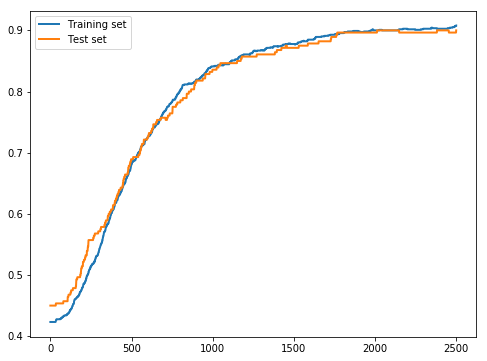

In [7]:
fig = plt.figure(figsize=(8,6))
subplot = fig.add_subplot(1,1,1)
subplot.plot(range(len(train_accuracy)), train_accuracy, linewidth=2, label='Training set')
subplot.plot(range(len(test_accuracy)), test_accuracy, linewidth=2, label='Test set')
subplot.legend(loc='upper left')